In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [420]:
df=pd.read_csv('/content/train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [421]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [422]:
#dropping reg and commission since these are dependant on the sales price also prt id as it is redundant
df1=df.drop(['REG_FEE','COMMIS','PRT_ID'],axis='columns')
df1.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [423]:
df2=df1.copy()
df2.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [424]:
df2.isnull().sum() #is null used to find the null values

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [425]:
df2['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

**DATA CLEANING**

In [426]:
# since the area column has many categories with same name including spaces
area_1=['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar']
area={'Chrmpet':'Chrompet','Chrompt':'Chrompet','Chormpet':'Chrompet','Ana Nagar':'Anna Nagar','TNagar':'T Nagar','Karapakam':'Karapakkam','Adyr':'Adyar','Ann Nagar':'Anna Nagar','Velchery':'Velachery','KKNagar':'KK Nagar'}

In [427]:
for i in df2['AREA']:
  if i in area:
    df2.AREA.replace(i,area[i],inplace=True)
    print(i,area[i])

TNagar T Nagar
Chrompt Chrompet
Chrmpet Chrompet
Karapakam Karapakkam
Ana Nagar Anna Nagar
Chormpet Chrompet
Adyr Adyar
Velchery Velachery
Ann Nagar Anna Nagar
KKNagar KK Nagar


In [428]:
df2.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [429]:
df2.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [430]:
df2.AREA=df2.AREA.replace(area)

In [431]:
df2.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [432]:
df2.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [433]:
df2.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [434]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  SALES_PR

In [435]:
df2['N_BEDROOM']=df2['N_BEDROOM'].fillna(int(df2['N_BEDROOM'].mode()))
df2['N_BATHROOM']=df2['N_BATHROOM'].fillna(int(df2['N_BATHROOM'].mode()))
df2['QS_OVERALL']=df2['QS_OVERALL'].fillna(float(df2['QS_OVERALL'].mean())) #fill the null values with the mean of the column

In [436]:
df2.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

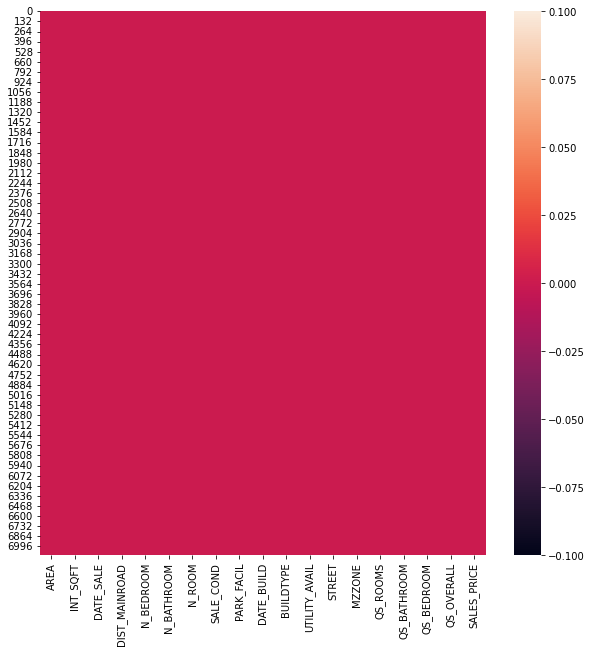

In [437]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.isnull(),cbar=True) # we can see there no null values in the dataframe

In [438]:
df2.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [439]:
df2['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [440]:
sale={'Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial','Adj Land':'AdjLand'}
df2['SALE_COND'].replace(sale,inplace=True)
df2['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [441]:
df2.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [442]:
park={'Noo':'No'}

In [443]:
df2.PARK_FACIL.replace(park,inplace=True)
df2.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [444]:
build={'Other':'Others','Comercial':'Commercial'}

In [445]:
df2.BUILDTYPE.replace(build,inplace=True)
df2.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [446]:
df2.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [447]:
pub={'AllPub':'All Pub'}

In [448]:
df2.UTILITY_AVAIL.replace(pub,inplace=True)
df2.UTILITY_AVAIL.value_counts()

All Pub    1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [449]:
df2.UTILITY_AVAIL.unique()

array(['All Pub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

In [450]:
df2.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [451]:
df2.STREET.replace(to_replace=['Pavd','NoAccess'],value=['Paved','No Access'],inplace=True)
df2.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [452]:
df2.DATE_SALE=pd.to_datetime(df2['DATE_SALE'])
df2.DATE_BUILD=pd.to_datetime(df2['DATE_BUILD'])

In [453]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   float64       
 5   N_BATHROOM     7109 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

In [454]:
df2.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250


**EXPLORATORY DATA ANALYSIS**

In [455]:
Discrete=[]
continuous=[]
for i in df2:
  if (df[i].dtypes=='O'):
    Discrete.append(i)
  else:
    continuous.append(i)

In [456]:
Discrete

['AREA',
 'DATE_SALE',
 'SALE_COND',
 'PARK_FACIL',
 'DATE_BUILD',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [457]:
continuous

['INT_SQFT',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'SALES_PRICE']

In [458]:
df2

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-03-01,51,1.0,1.0,2,AdjLand,No,1962-01-15,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000
7105,Velachery,1897,2004-08-04,52,3.0,2.0,5,Family,Yes,1995-11-04,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480
7106,Velachery,1614,2006-08-25,152,2.0,1.0,4,Normal Sale,No,1978-01-09,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410
7107,Karapakkam,787,2009-03-08,40,1.0,1.0,2,Partial,Yes,1977-11-08,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000


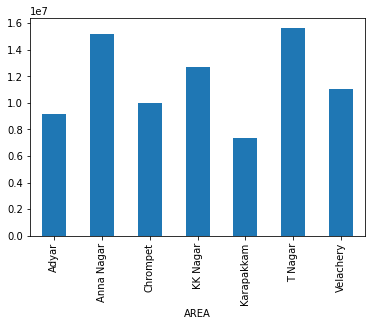

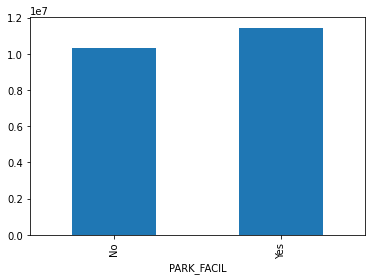

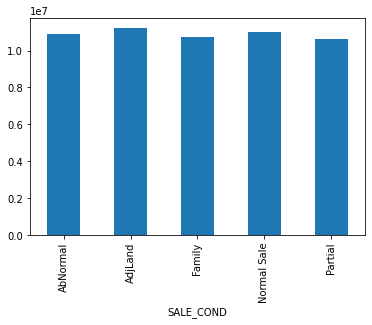

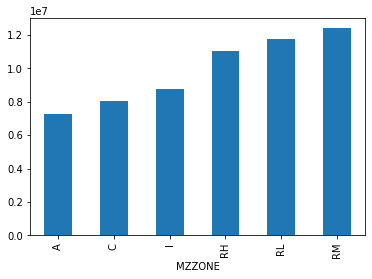

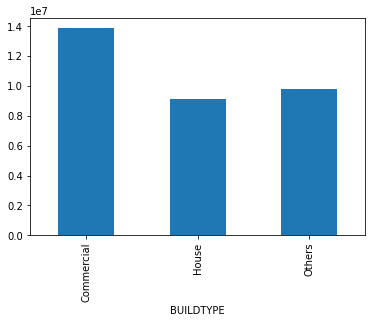

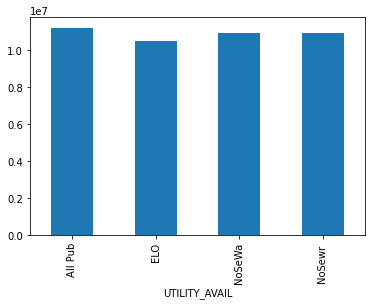

In [459]:
df2.groupby("AREA")['SALES_PRICE'].mean().plot.bar()
plt.show()
df2.groupby("PARK_FACIL")['SALES_PRICE'].mean().plot.bar()
plt.show()
df2.groupby("SALE_COND")['SALES_PRICE'].mean().plot.bar()
plt.show()
df2.groupby("MZZONE")['SALES_PRICE'].mean().plot.bar()
plt.show()
df2.groupby("BUILDTYPE")['SALES_PRICE'].mean().plot.bar()
plt.show()
df2.groupby("UTILITY_AVAIL")['SALES_PRICE'].mean().plot.bar()
plt.show()


In [460]:
df2['INT_SQFT']=df2['INT_SQFT'].astype(int)
df2['N_BEDROOM']=df2['N_BEDROOM'].astype(int)

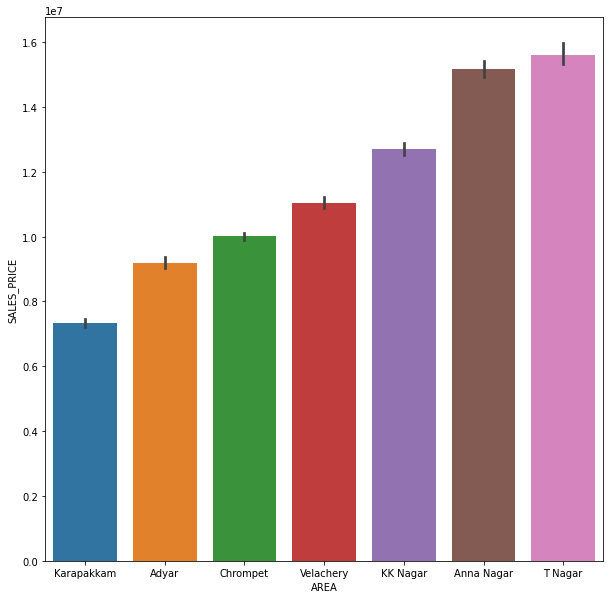

In [461]:
plt.figure(figsize=(10,10))
sns.barplot(x='AREA',y='SALES_PRICE',data=df2,order=df2.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

**There is a linear relationship between the area and the salesprice**

In [462]:
df2.groupby('AREA')['SALES_PRICE'].agg([('MEAN','mean')]).sort_values('MEAN')

,MEAN
AREA,
Karapakkam,7.340100e+06
Adyar,9.185668e+06
Chrompet,1.001381e+07
Velachery,1.104735e+07
KK Nagar,1.269623e+07
Anna Nagar,1.516820e+07
T Nagar,1.561674e+07


In [463]:
df2['AREA']= df2['AREA'].replace({
    'Karapakkam':0,
    'Adyar':1,
    'Chrompet':2,
    'Velachery':3,
    'KK Nagar':4,
    'Anna Nagar':5,
    'T Nagar':6,
})
#Labeling the data to numeric Values

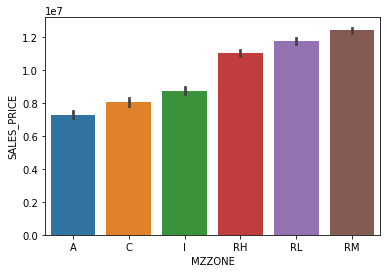

In [464]:
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df2,order=df2.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["MZZONE"])

**It looks like there is a linear relationship between the zone and salesprice**

In [465]:
df2.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('MZZONE')

,MZZONE,SALES_PRICE
0,A,7.292591e+06
1,C,8.052270e+06
2,I,8.738633e+06
3,RH,1.103997e+07
4,RL,1.176576e+07
5,RM,1.240707e+07


In [466]:
df2['MZZONE']=df2['MZZONE'].replace({'A':0,
    'C':1,
    'I':2,
    'RH':3,
    'RL':4,
    'RM':5})
#Labeling the data to numeric Values

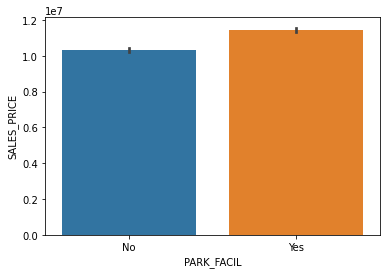

In [467]:
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df2,order=df2.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])

**there is a relationship between the park facil and sales price price is higher where there is park facil avalilable**

In [468]:
df2.groupby('PARK_FACIL')['SALES_PRICE'].agg([('PARK','mean')]).sort_values('PARK')

,PARK
PARK_FACIL,
No,1.033805e+07
Yes,1.144168e+07


In [469]:
df2['PARK_FACIL']= df2['PARK_FACIL'].replace({
    'No':0,
    'Yes':1
})
#Labeling the data to numeric Values

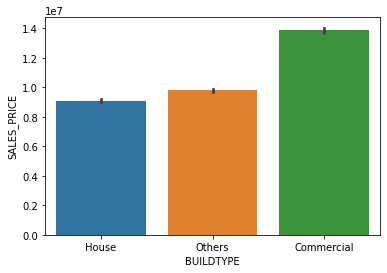

In [470]:
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df2,order=df2.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

**there is a relationship between the buildtype and the sales price since the build type commercial has higher price than the other types**

In [471]:
df2['BUILDTYPE'].replace({'House':0,'Others':1,'Commercial':2},inplace=True)

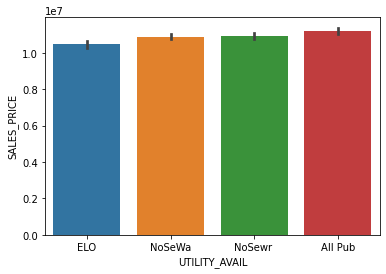

In [472]:
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df2,order=df2.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

**there is a slight relationship between the utility and sales price but doesnt have major impact**

In [473]:
df2['UTILITY_AVAIL']= df2['UTILITY_AVAIL'].replace({
    'ELO':0,
    'NoSeWa':1,
    'NoSewr ':2,
    'All Pub':3
})
#Labeling the data to numeric Values

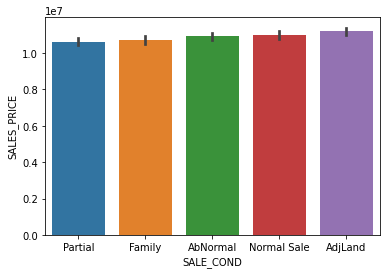

In [474]:
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df2,order=df2.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

**There is a slight relationship between the sale cond and the sales price**

In [475]:
df2['SALE_COND']=df2['SALE_COND'].replace({'Partial':0,'Family':1,'AbNormal':2,'Normal Sale':3,'AdjLand':4})
#Labelling the categorical values

In [476]:
df2['SALE_COND'].unique()

array([2, 1, 0, 4, 3])

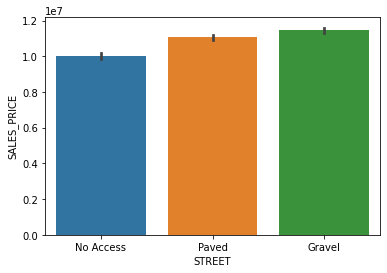

In [477]:
sns.barplot(x='STREET',y='SALES_PRICE',data=df2,order=df2.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

**There is a relationship between street and the sales price it looks like there is slight linear relationship**

In [478]:
df2['STREET']= df2['STREET'].replace({
    'No Access':0,
    'Paved':1,
    'Gravel':2
})
#Labeling the data to numeric Values

**Lets check out the realtionship between the continuous values and the sales price to identify the best continuous feature to include in the model**

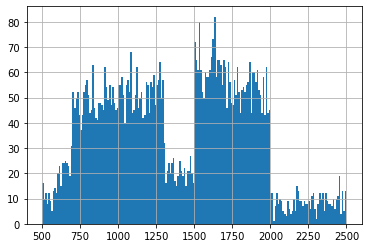

In [479]:
df2['INT_SQFT'].hist(bins=200)

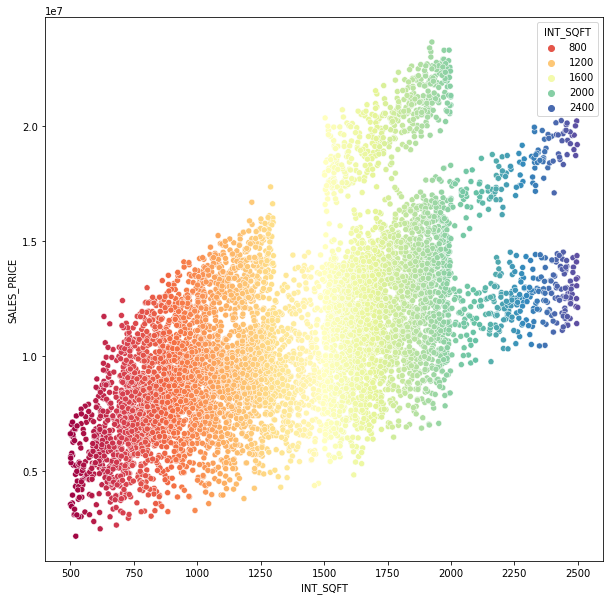

In [480]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='INT_SQFT',y='SALES_PRICE',data=df2,hue='INT_SQFT',palette='Spectral')

**We can see that there is a relationship between int sqft and the sales price when the int sqft increases the sales price increases**

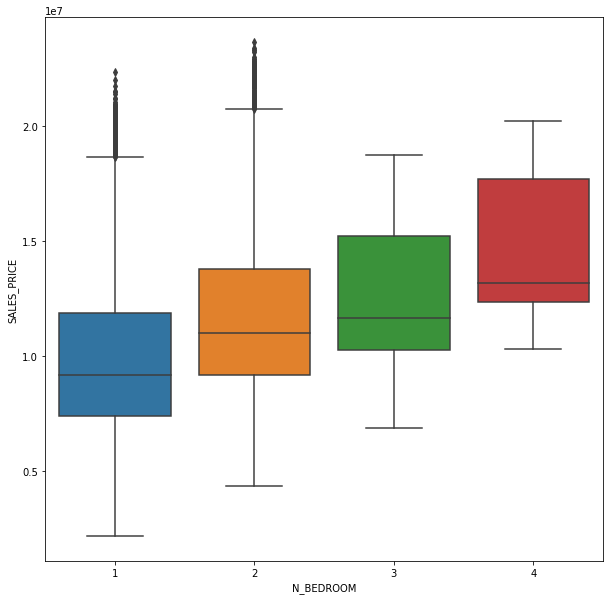

In [481]:
plt.figure(figsize=(10,10))
sns.boxplot(x='N_BEDROOM',y='SALES_PRICE',data=df2)

**There is increase in sales price when the no of bedrooms is increased**

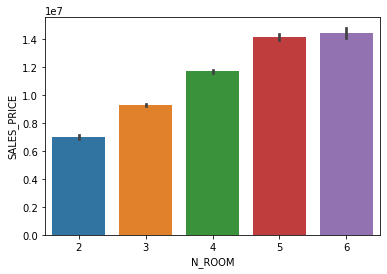

In [482]:
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df2,order=df2.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])

**We can see that there is increase in price when the no of rooms in the house is increased**

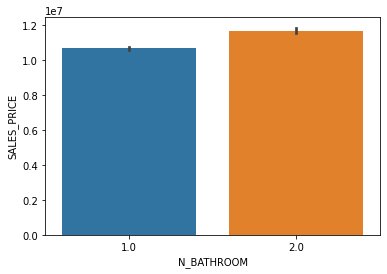

In [483]:
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df2,order=df2.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM'])

**It is clearly indicated that the there is price increase when there the no of bathrooms increases**

In [484]:
df2.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,0,1004,2011-04-05,131,1,1.0,3,2,1,1967-05-15,2,3,1,0,4.0,3.9,4.9,4.330,7600000
1,5,1986,2006-12-19,26,2,1.0,5,2,0,1995-12-22,2,3,2,3,4.9,4.2,2.5,3.765,21717770
2,1,909,2012-04-02,70,1,1.0,3,2,1,1992-09-02,2,0,2,4,4.1,3.8,2.2,3.090,13159200
3,3,1855,2010-03-13,14,3,2.0,5,1,0,1988-03-18,1,2,1,2,4.7,3.9,3.6,4.010,9630290
4,0,1226,2009-05-10,84,1,1.0,3,2,1,1979-10-13,1,3,2,1,3.0,2.5,4.1,3.290,7406250


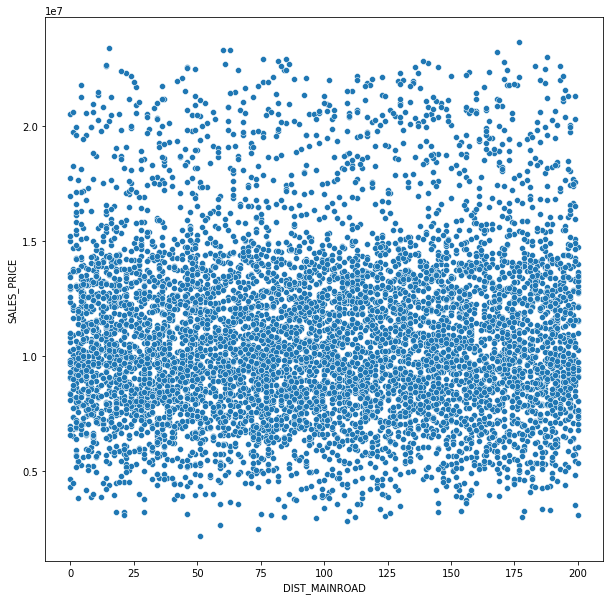

In [485]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df2,palette='Spectral')

**There is uniform distribution between the dist main road and the sales price so there is no major relationship between the distance from the main road and the sales price**

In [486]:
Discrete

['AREA',
 'DATE_SALE',
 'SALE_COND',
 'PARK_FACIL',
 'DATE_BUILD',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [487]:
continuous

['INT_SQFT',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'SALES_PRICE']

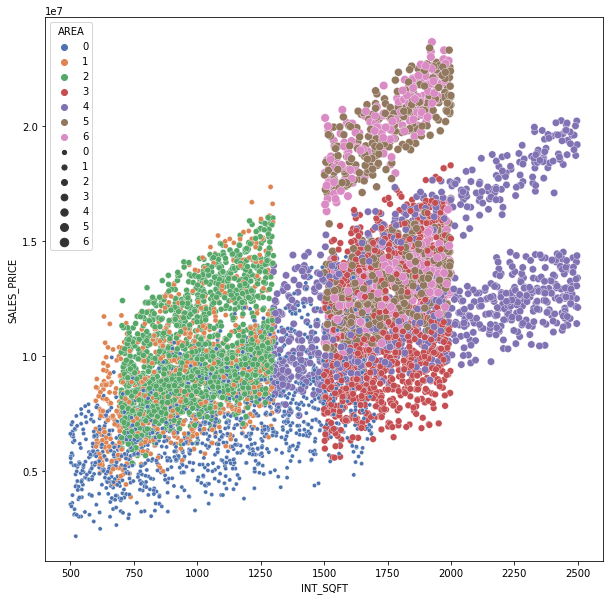

In [488]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='INT_SQFT',y='SALES_PRICE',data=df2,hue='AREA',palette='deep',size='AREA')

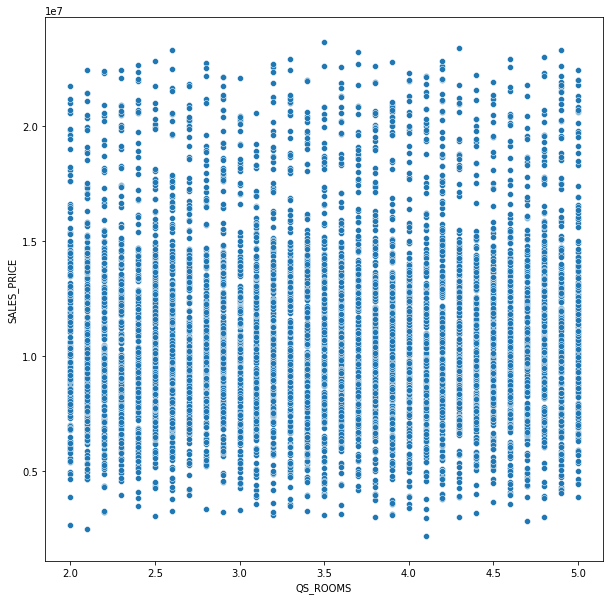

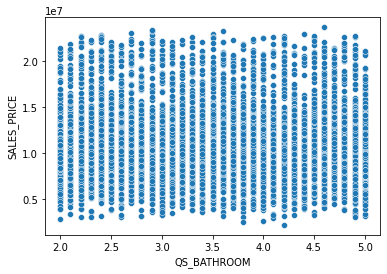

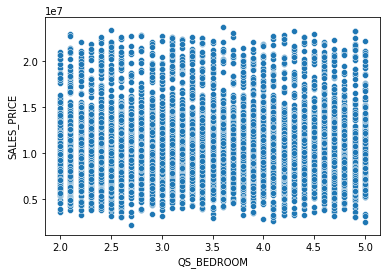

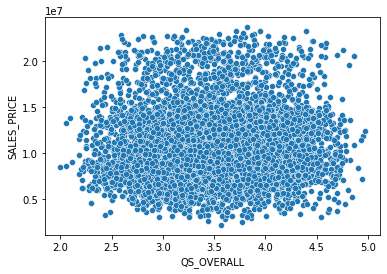

In [489]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='QS_ROOMS',y='SALES_PRICE',data=df2,palette='deep')
plt.show()
sns.scatterplot(x='QS_BATHROOM',y='SALES_PRICE',data=df2,palette='deep')
plt.show()
sns.scatterplot(x='QS_BEDROOM',y='SALES_PRICE',data=df2,palette='deep')
plt.show()
sns.scatterplot(x='QS_OVERALL',y='SALES_PRICE',data=df2,palette='deep')

**Since there is no much realtionship between the QS_overall,QS_rooms,QS_bedroom,QS_bathroom dropping these columns as there isnt much information**

In [490]:
df3=df2.drop(['QS_ROOMS','QS_OVERALL','QS_BEDROOM','QS_BATHROOM'],axis=1)

In [491]:
  df3['AGE']=pd.DatetimeIndex(df3['DATE_SALE']).year-pd.DatetimeIndex(df3['DATE_BUILD']).year

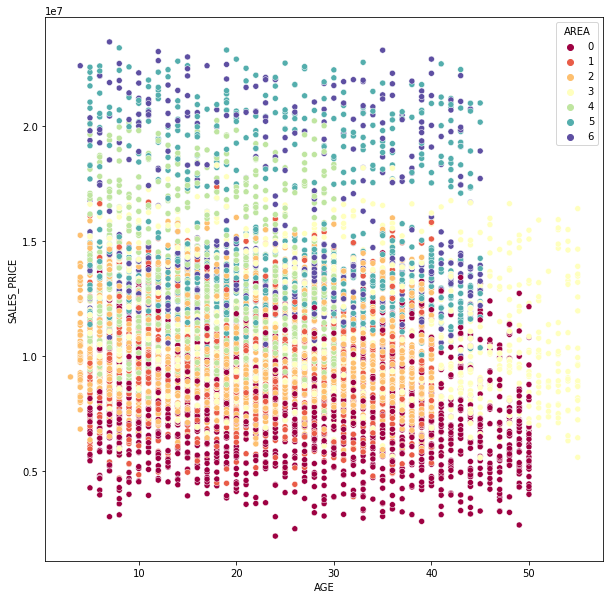

In [492]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='AGE',y='SALES_PRICE',data=df3,hue='AREA',palette='Spectral')

**There is a slight relationship between the age of the house and the sales price higher the age lower the sales price**

**Dropping the date columns as we have derived the age for the house from the date columns**

In [493]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   int64         
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   int64         
 5   N_BATHROOM     7109 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   int64         
 8   PARK_FACIL     7109 non-null   int64         
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   int64         
 11  UTILITY_AVAIL  7109 non-null   int64         
 12  STREET         7109 non-null   int64         
 13  MZZONE         7109 non-null   int64         
 14  SALES_PRICE    7109 non-null   int64         
 15  AGE            7109 n

In [494]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   int64         
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   int64         
 5   N_BATHROOM     7109 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   int64         
 8   PARK_FACIL     7109 non-null   int64         
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   int64         
 11  UTILITY_AVAIL  7109 non-null   int64         
 12  STREET         7109 non-null   int64         
 13  MZZONE         7109 non-null   int64         
 14  SALES_PRICE    7109 non-null   int64         
 15  AGE            7109 n

In [495]:
df3['UTILITY_AVAIL'].replace({'NoSewr ':2},inplace=True)

In [496]:
df3['UTILITY_AVAIL'].unique()

array([3, 0, 2, 1])

In [497]:
df3.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,0,1004,2011-04-05,131,1,1.0,3,2,1,1967-05-15,2,3,1,0,7600000,44
1,5,1986,2006-12-19,26,2,1.0,5,2,0,1995-12-22,2,3,2,3,21717770,11
2,1,909,2012-04-02,70,1,1.0,3,2,1,1992-09-02,2,0,2,4,13159200,20
3,3,1855,2010-03-13,14,3,2.0,5,1,0,1988-03-18,1,2,1,2,9630290,22
4,0,1226,2009-05-10,84,1,1.0,3,2,1,1979-10-13,1,3,2,1,7406250,30


In [498]:
df3.drop(['DATE_BUILD','DATE_SALE','DIST_MAINROAD'],axis=1,inplace=True)

**Creating a machine learning model and using various machine learning algorithms**

In [499]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [500]:
X=df3.drop('SALES_PRICE',axis=1)
y=df3['SALES_PRICE']

In [501]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   int64  
 1   INT_SQFT       7109 non-null   int64  
 2   N_BEDROOM      7109 non-null   int64  
 3   N_BATHROOM     7109 non-null   float64
 4   N_ROOM         7109 non-null   int64  
 5   SALE_COND      7109 non-null   int64  
 6   PARK_FACIL     7109 non-null   int64  
 7   BUILDTYPE      7109 non-null   int64  
 8   UTILITY_AVAIL  7109 non-null   int64  
 9   STREET         7109 non-null   int64  
 10  MZZONE         7109 non-null   int64  
 11  SALES_PRICE    7109 non-null   int64  
 12  AGE            7109 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 722.1 KB


In [502]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [503]:
lr=LinearRegression()

In [504]:
lr.fit(X_train,y_train)
predict=lr.predict(X_test)
r2_score(y_test,predict)


0.8768689619709713

In [505]:
rr=RandomForestRegressor()
rr.fit(X_train,y_train)
predicts=rr.predict(X_test)
r2_score(y_test,predicts)


0.9902871231788615

In [506]:
ds=DecisionTreeRegressor()
ds.fit(X_train,y_train)
new=ds.predict(X_test)
r2_score(y_test,new)

0.9746563255256381

In [509]:
y_test

3913    13376150
2726    12857440
6220    19124310
2716     4905000
5459    13534450
          ...   
3524     9987005
3010     5821000
66      13364730
1642    17115030
5577     8224000
Name: SALES_PRICE, Length: 1422, dtype: int64

In [508]:
new

array([13840875., 12459280., 19627640., ..., 14086140., 17959010.,
        8410150.])

In [507]:
xg=XGBRegressor()
xg.fit(X_train,y_train)
news=xg.predict(X_test)
r2_score(y_test,news)

[08:20:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9924737477551193

**Based on all the Models outcomes XGBRegressor Model (99.2%) gives the best results. RandomForestRegressor(99%),Decision tree(97%) and Liner Regression (87%).**